In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [26]:
# Upload dataset
customer_data =pd.read_csv('Mall_Customers.csv')

In [27]:
customer_data


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [28]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [29]:
x = customer_data.drop( columns = [ 'CustomerID' ,'Gender', 'Age'],axis = 1).values

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


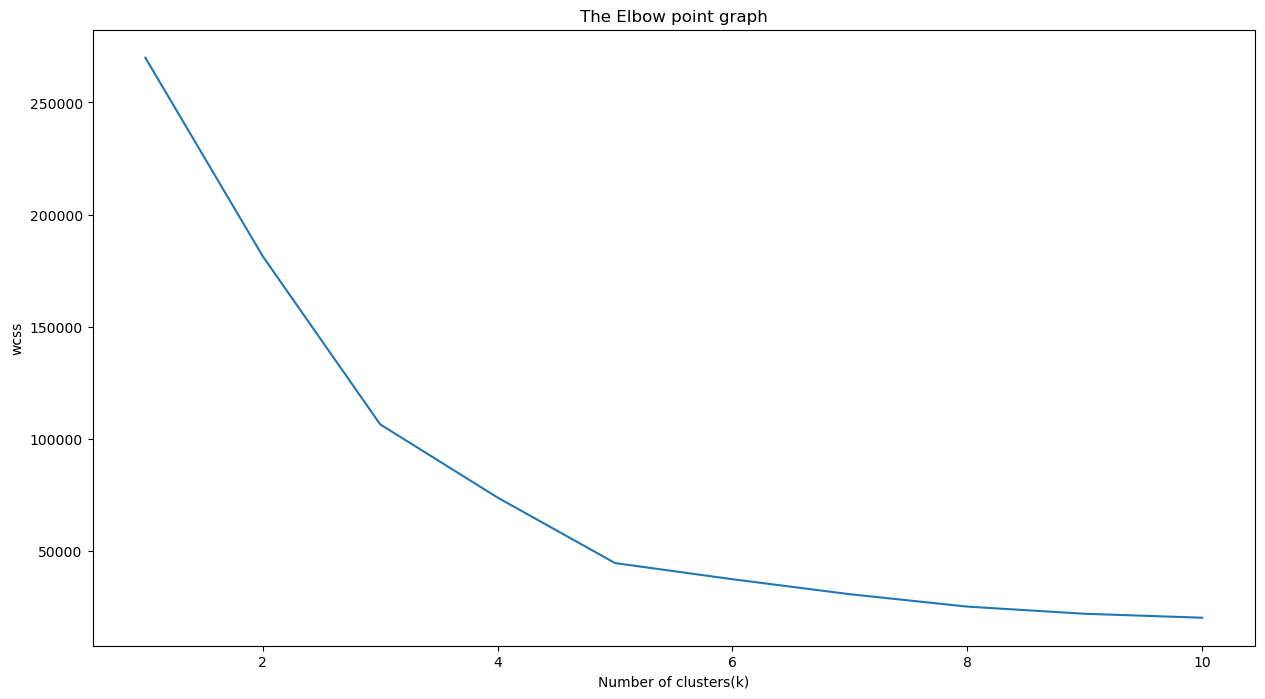

In [31]:

wcss =[]
for i in range(1,11):
    kmeans = KMeans (n_clusters=i,init ='k-means++' , random_state = 2)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11),wcss)
plt.title('The Elbow point graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss')
plt.show()

In [33]:
#applying k-means 
kmeans = KMeans(n_clusters = 5 ,init = 'k-means++' , random_state = 0)
Y = kmeans.fit_predict(x)

In [34]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

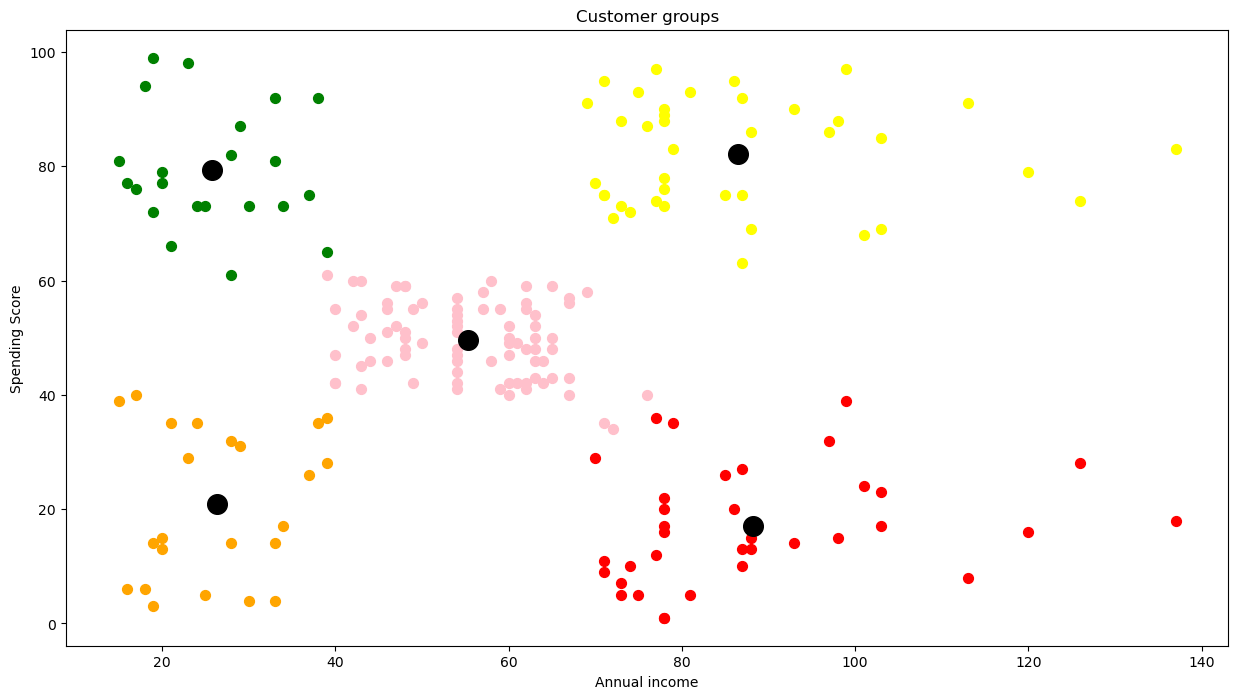

In [40]:
plt.figure(figsize = (15,8))
plt.scatter(x[Y == 0,0], x[Y == 0, 1], s=50, c= 'red', label='Cluster 1')
plt.scatter(x[Y == 1,0], x[Y == 1, 1], s=50, c= 'pink', label='Cluster 2')
plt.scatter(x[Y == 2,0], x[Y == 2, 1], s=50, c= 'yellow', label='Cluster 3')
plt.scatter(x[Y == 3,0], x[Y == 3, 1], s=50, c= 'green', label='Cluster 4')
plt.scatter(x[Y == 4,0], x[Y == 4, 1], s=50, c= 'orange', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.title('Customer groups')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.show()